In [1]:
# Standard imports
import pathlib

# Third party imports
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.lines import Line2D

# Internal imports

In [6]:
# set plot style
%matplotlib widget
plt.style.use('plot_style.txt')

# output path for figures 
output_path = pathlib.Path("/home/jonas/shared/Work/SSeep2026/Figures")

# set equation colors
c_ap_dis = "#d65d17ff"
c_ex_dis = "#57db2fff"
c_mf = "#14b7ccff"
c_ap_mean = "#cc14adff"
c_ex_mean = "#344d05ff"


In [14]:
# load data
df = pd.read_csv('exp5_vGM_SAND_LOAM/rel_error.csv', index_col=0)
idx = np.logical_and(df['unsaturated'], df['clogged'])

print(f"Fraction of unsaturated configurations: {df['unsaturated'].mean():.2f}")
print(f"Fraction of clogged configurations: {df['clogged'].mean():.2f}")
print(f"Fraction of configurations with vanishing capillary zone: " \
      f"{df['van_cap_zone'].mean():.2f}")
print(f"Fraction of valid (unsaturated and clogged) configurations: " \
      f"{idx.mean():.2f}")

df = df.loc[idx]

Fraction of unsaturated configurations: 0.88
Fraction of clogged configurations: 0.97
Fraction of configurations with vanishing capillary zone: 0.17
Fraction of valid (unsaturated and clogged) configurations: 0.88


/tmp/ipykernel_79206/1841528643.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


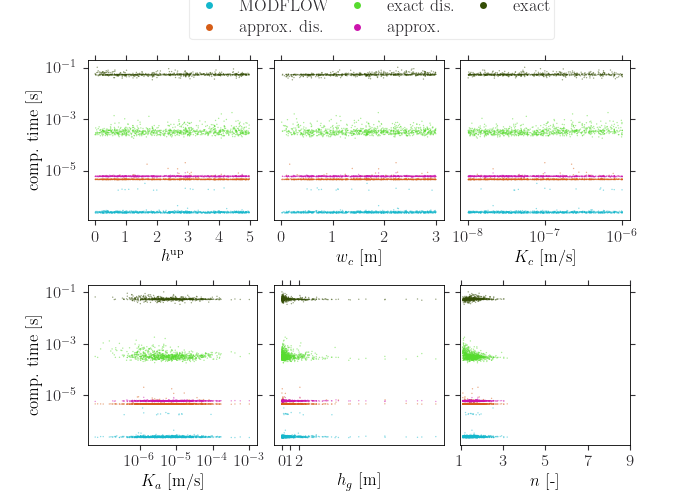

In [15]:
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.1)
axs = gs.subplots(sharex=False, sharey=True)

y1 = df['dt_mf'].values
y2 = df['dt_ap_dis'].values
y3 = df['dt_ex_dis'].values
y4 = df['dt_ap_mean'].values
y5 = df['dt_ex_mean'].values

# stage
i1, i2 = 0, 0
x = df['stage'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_ap_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_ex_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y4, c=c_ap_mean, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y5, c=c_ex_mean, s=1, alpha=0.5, ec='None')


axs[i1, i2].set_xlabel('$h^\\mathrm{{up}}$', fontsize=12)
axs[i1, i2].set_ylabel('comp. time [s]', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3, 4, 5])
# axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8])
# axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# clogging thickness
i1, i2 = 0, 1
x = df['cl_th'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_ap_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_ex_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y4, c=c_ap_mean, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y5, c=c_ex_mean, s=1, alpha=0.5, ec='None')


axs[i1, i2].set_xlabel('$w_c$ [m]', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3])
# axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
# axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# clogging conductivity
i1, i2 = 0, 2
x = np.log10(df['cl_cond'].values)
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_ap_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_ex_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y4, c=c_ap_mean, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y5, c=c_ex_mean, s=1, alpha=0.5, ec='None')

axs[i1, i2].set_xlabel('$K_c$ [m/s]', fontsize=12)
axs[i1, i2].set_xticks([-8, -7, -6], labels=['$10^{-8}$', '$10^{-7}$',
                                             '$10^{-6}$'])
# axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
# axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# aquifer conductivity
i1, i2 = 1, 0
x = np.log10(df['aq_cond'].values)
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_ap_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_ex_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y4, c=c_ap_mean, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y5, c=c_ex_mean, s=1, alpha=0.5, ec='None')

axs[i1, i2].set_xlabel('$K_a$ [m/s]', fontsize=12)
axs[i1, i2].set_ylabel('comp. time [s]', fontsize=12)
axs[i1, i2].set_xticks([-6, -5, -4, -3], labels=['$10^{-6}$', '$10^{-5}$',
                                                 '$10^{-4}$', '$10^{-3}$'])
# axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8])
# axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# aquifer scale
i1, i2 = 1, 1
x = df['aq_scale'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_ap_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_ex_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y4, c=c_ap_mean, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y5, c=c_ex_mean, s=1, alpha=0.5, ec='None')

axs[i1, i2].set_xlabel('$h_g$ [m]', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2])
# axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
# axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)


# aquifer shape
i1, i2 = 1, 2
x = df['aq_shape'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_ap_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_ex_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y4, c=c_ap_mean, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y5, c=c_ex_mean, s=1, alpha=0.5, ec='None')

axs[i1, i2].set_xlabel('$n$ [-]', fontsize=12)
axs[i1, i2].set_xticks([1, 3, 5, 7, 9])
# axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
# axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)


for ax in axs.flatten():
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.minorticks_off()
    ax.set_yscale('log')


legend = [
    Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_mf,
           markeredgecolor='None', label='MODFLOW'),
    Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_ap_dis,
           markeredgecolor='None', label='approx. dis.'),
    Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_ex_dis,
           markeredgecolor='None', label='exact dis.'), 
    Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_ap_mean,
           markeredgecolor='None', label='approx.'),
    Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_ex_mean,
           markeredgecolor='None', label='exact')]
plt.legend(handles=legend, bbox_to_anchor=(0, 2.8, 0.6, 0.05), fontsize=12,
           ncols=3, columnspacing=0.7)

plt.tight_layout()
plt.savefig(output_path / 'dt_correlation_vGM_SAND_LOAM.pdf')